In [530]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

In [531]:
pd.set_option('display.max_columns', None)

In [532]:
df=pd.read_csv("Data/DE&CO_14_06.csv")
df.drop_duplicates(inplace=True)
df.dropna(subset=["order_id"], inplace=True)
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,seller_city,seller_state,order_id.1,payment_sequential,payment_type,payment_installments,payment_value,customer_id.1,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02.000,2017-09-13 09:45:35.000,2017-09-19 18:34:16.000,2017-09-20 23:43:48.000,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,volta redonda,SP,00010242fe8c5a6d1ba2dd792cb16214,1.0,credit_card,2.0,72.19,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013.0,campos dos goytacazes,RJ,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06.000,2017-04-26 11:05:13.000,2017-05-04 14:35:00.000,2017-05-12 16:04:24.000,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,sao paulo,SP,00018f77f2f0320c557190d7a144bdd3,1.0,credit_card,3.0,259.83,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,15775.0,NaN,NaN,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31.000,2018-01-14 14:48:30.000,2018-01-16 12:36:48.000,2018-01-22 13:19:16.000,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,borda da mata,MG,000229ec398224ef6ca0657da4fc703e,1.0,credit_card,5.0,216.87,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,35661.0,NaN,NaN,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51.000,2017-02-04 14:10:13.000,2017-02-16 09:46:09.000,2017-03-01 16:42:31.000,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,loanda,PR,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,credit_card,3.0,218.04,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,13226.0,VARZEA PAULISTA,SP,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34.000,2017-05-17 03:55:27.000,2017-05-17 11:05:55.000,2017-05-22 13:44:35.000,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,36.0,558.0,1.0,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,ribeirao preto,SP,00048cc3ae777c65dbb7d2a0634bc1ea,1.0,boleto,1.0,34.59,816cbea969fe5b689b39cfc97a506742,85c835d128beae5b4ce8602c491bf385,38017.0,NaN,NaN,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00.000,2017-10-28 02:55:58.000,2017-11-10 19:31

In [533]:
df.drop(columns=['order_id.1','customer_id.1',"product_name_lenght","product_description_lenght","product_photos_qty"],inplace=True)

In [534]:
vazios=df.isnull().sum()
#vazios

Como não falta nenum zip_code_prefix, e faltaa bastante informação da cidade e estado, acredito que faça sentido fazer um drop de ["customer_city","customer_state"], já que essa informação é vazia em diversos casos, mas está contida no zip_code

In [535]:
df.drop(columns=["customer_city","customer_state","seller_city","seller_state"], inplace=True)

In [536]:
vazios=df.isnull().sum()
vazios

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date        1
order_delivered_customer_date       0
delivery_time                       0
delivery_time_model                 0
product_id                          0
product_category_name            1450
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
seller_id                           0
seller_zip_code_prefix              0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
customer_unique_id                  0
customer_zip_code_prefix            0
order_id.2                          0
order_item_id                       0
product_id.1                        0
seller_id.1 

In [537]:
df[df["order_approved_at"]==None]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value


In [538]:
df=df[df["order_approved_at"].notnull()]
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02.000,2017-09-13 09:45:35.000,2017-09-19 18:34:16.000,2017-09-20 23:43:48.000,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06.000,2017-04-26 11:05:13.000,2017-05-04 14:35:00.000,2017-05-12 16:04:24.000,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31.000,2018-01-14 14:48:30.000,2018-01-16 12:36:48.000,2018-01-22 13:19:16.000,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51.000,2017-02-04 14:10:13.000,2017-02-16 09:46:09.000,2017-03-01 16:42:31.000,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34.000,2017-05-17 03:55:27.000,2017-05-17 11:05:55.000,2017-05-22 13:44:35.000,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00.000,2017-10-28 02:55:58.000,2017-11-10 19:31:52.000,2017-11-17 19:41:42.000,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58.000,55.00,34.19
117596,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00.000,2017-10-28 02:55:58.000,2017-11-10 19:31:52.000,2017-11-17 19:41:42.000,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb922

In [539]:
#df.loc[df["product_height_cm"].isnull(),["product_height_cm","product_weight_g","product_length_cm","product_width_cm"]]
#type(df.loc[5139,"product_height_cm"])

In [540]:
df=df[df["product_height_cm"].notnull()]
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        1
order_delivered_customer_date       0
delivery_time                       0
delivery_time_model                 0
product_id                          0
product_category_name            1430
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_id                           0
seller_zip_code_prefix              0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
customer_unique_id                  0
customer_zip_code_prefix            0
order_id.2                          0
order_item_id                       0
product_id.1                        0
seller_id.1 

In [541]:
display(df)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02.000,2017-09-13 09:45:35.000,2017-09-19 18:34:16.000,2017-09-20 23:43:48.000,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06.000,2017-04-26 11:05:13.000,2017-05-04 14:35:00.000,2017-05-12 16:04:24.000,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31.000,2018-01-14 14:48:30.000,2018-01-16 12:36:48.000,2018-01-22 13:19:16.000,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51.000,2017-02-04 14:10:13.000,2017-02-16 09:46:09.000,2017-03-01 16:42:31.000,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34.000,2017-05-17 03:55:27.000,2017-05-17 11:05:55.000,2017-05-22 13:44:35.000,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00.000,2017-10-28 02:55:58.000,2017-11-10 19:31:52.000,2017-11-17 19:41:42.000,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58.000,55.00,34.19
117596,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00.000,2017-10-28 02:55:58.000,2017-11-10 19:31:52.000,2017-11-17 19:41:42.000,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb922

In [542]:
#df.info()


In [543]:
df["order_purchase_timestamp"]=pd.to_datetime(df["order_purchase_timestamp"])
df["order_approved_at"]=pd.to_datetime(df["order_approved_at"])
df["order_delivered_carrier_date"]=pd.to_datetime(df["order_delivered_carrier_date"])
df["order_delivered_customer_date"]=pd.to_datetime(df["order_delivered_customer_date"])
display(df)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22780\1623678059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_purchase_timestamp"]=pd.to_datetime(df["order_purchase_timestamp"])
C:\Users\Dell\AppData\Local\Temp\ipykernel_22780\1623678059.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["order_approved_at"]=pd.to_datetime(df["order_approved_at"])
C:\Users\Dell\AppData\Local\Temp\ipykernel_22780\1623678059.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,2017-05-17 03:55:27,2017-05-17 11:05:55,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58.000,55.00,34.19
117596,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,2017-10-28 02:55:58,2017-11-10 19:31:52,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb9224b6fc7c43ebb0904318b10b5f,3,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:5

In [544]:
#df.info()

In [545]:
df.loc[0,"order_approved_at"]-df.loc[0,"order_purchase_timestamp"]

Timedelta('0 days 00:46:33')

In [546]:
#df[df["order_status"]=="canceled"]

In [547]:
#Criando colunas para analisar o tempo dedicado a cada etapa


PEDIDO_APROVAÇÃO=df["order_approved_at"]-df["order_purchase_timestamp"]
PA2=[]
for elem in PEDIDO_APROVAÇÃO:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    PA2.append(elem)



SEPARAÇÃO_DO_PEDIDO=df["order_delivered_carrier_date"]-df["order_approved_at"]
SDP2=[]
for elem in SEPARAÇÃO_DO_PEDIDO:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    SDP2.append(elem)


PEDIDO_TRANSPORTE=df["order_delivered_customer_date"] - df["order_delivered_carrier_date"]
PT2=[]
for elem in PEDIDO_TRANSPORTE:
    elem=elem.total_seconds()/(24*3600)
    elem=round(elem,2)
    PT2.append(elem)

df.insert(4,"Pedido em aprovação",PA2)
df.insert(6,"Separando o pedido",SDP2)
df.insert(8,"Pedido em transporte",PT2)
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,0.01,2017-04-26 11:05:13,8.15,2017-05-04 14:35:00,8.06,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,0.01,2017-02-04 14:10:13,11.82,2017-02-16 09:46:09,13.29,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58.000,55.00,34.19
117596,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1

Analisando um pouco a distribuição de delivery_time

<Axes: xlabel='delivery_time', ylabel='Count'>

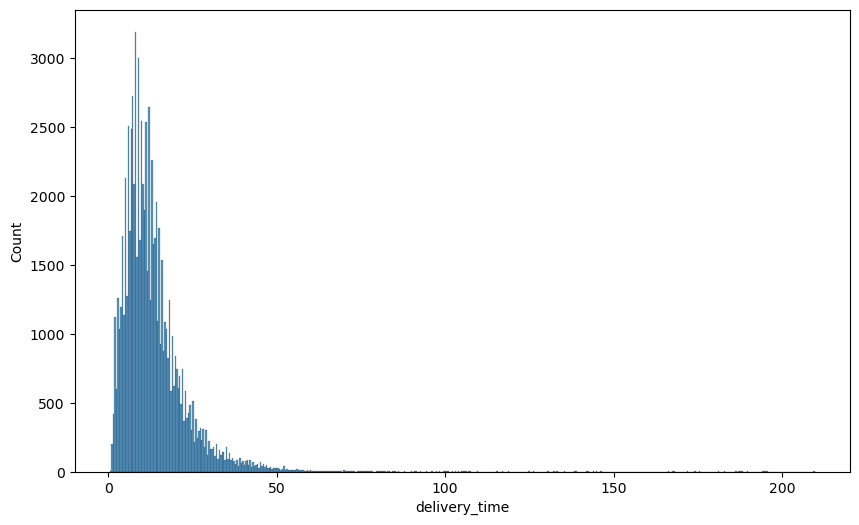

In [548]:
plt.figure(figsize=(10,6))
sns.histplot(df["delivery_time"])

In [549]:

df["delivery_time"].describe()

count    81736.000000
mean        13.363937
std          9.639001
min          0.530000
25%          7.280000
50%         11.180000
75%         16.750000
max        209.630000
Name: delivery_time, dtype: float64

In [550]:
def outliers(coluna):
    q1=np.percentile(df[coluna],25)
    q3=np.percentile(df[coluna],75)

    iqr=q3-q1
    out_sup=q3+iqr*1.5
    out_inf=q1-iqr*1.5
    return(out_inf,out_sup)

out_inf,out_sup=outliers("delivery_time")

In [551]:
df=df[df["delivery_time"]<out_sup]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,0.01,2017-04-26 11:05:13,8.15,2017-05-04 14:35:00,8.06,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,0.01,2017-02-04 14:10:13,11.82,2017-02-16 09:46:09,13.29,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58.000,55.00,34.19
117596,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1

Análise da coluna "Pedido em Aprovação"

<Axes: xlabel='Pedido em aprovação', ylabel='Count'>

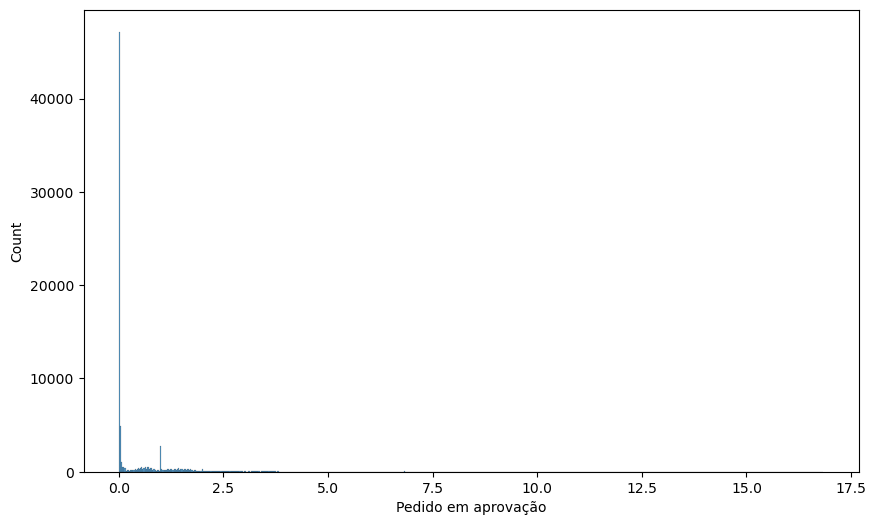

In [552]:
plt.figure(figsize=(10,6))
sns.histplot(df["Pedido em aprovação"])


In [553]:
df["Pedido em aprovação"].describe()

count    77800.000000
mean         0.425197
std          0.848578
min          0.000000
25%          0.010000
50%          0.010000
75%          0.580000
max         16.840000
Name: Pedido em aprovação, dtype: float64

In [554]:
out_inf,out_sup=outliers("Pedido em aprovação")

df=df[df["Pedido em aprovação"]<out_sup]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,0.01,2017-04-26 11:05:13,8.15,2017-05-04 14:35:00,8.06,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,0.01,2017-02-04 14:10:13,11.82,2017-02-16 09:46:09,13.29,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58.000,55.00,34.19
117596,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1

Análise da coluna "Separando o pedido"

In [555]:

df["Separando o pedido"].describe()

count    69685.000000
mean         2.870157
std          2.786423
min         -0.950000
25%          1.040000
50%          2.030000
75%          3.830000
max         30.000000
Name: Separando o pedido, dtype: float64

In [556]:
df=df[df["Separando o pedido"]>0]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,0.01,2017-04-26 11:05:13,8.15,2017-05-04 14:35:00,8.06,2017-05-12 16:04:24,16.22,18.55,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,50.0,30.0,40.0,dd7ddc04e1b6c2c614352b383efe2d36,3471,1.0,credit_card,3.0,259.83,eb28e67c4c0b83846050ddfb8a35d051,15775.0,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13.000,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,0.01,2017-02-04 14:10:13,11.82,2017-02-16 09:46:09,13.29,2017-03-01 16:42:31,25.11,40.42,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,35.0,40.0,30.0,df560393f3a51e74553ab94004ba5c87,87900,1.0,credit_card,3.0,218.04,64b576fb70d441e8f1b2d7d446e483c5,13226.0,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51.000,199.90,18.14
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117595,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1.0,boleto,1.0,356.76,f736308cd9952b33b90b9fe94da9c8f5,56912.0,fffb9224b6fc7c43ebb0904318b10b5f,2,43423cdffde7fda63d0414ed38c11a73,b1fc4f64df5a0e8b6913ab38803c57a9,2017-11-03 02:55:58.000,55.00,34.19
117596,fffb9224b6fc7c43ebb0904318b10b5f,4d3abb73ceb86353aeadbe698aa9d5cb,delivered,2017-10-27 16:51:00,0.42,2017-10-28 02:55:58,13.69,2017-11-10 19:31:52,7.01,2017-11-17 19:41:42,21.12,30.30,43423cdffde7fda63d0414ed38c11a73,relogios_presentes,350.0,16.0,14.0,11.0,b1fc4f64df5a0e8b6913ab38803c57a9,24440,1

<Axes: xlabel='Separando o pedido', ylabel='Count'>

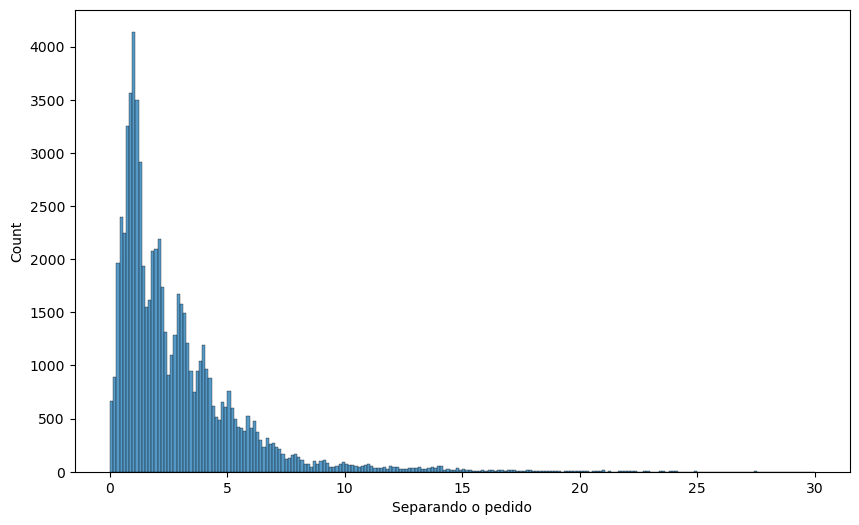

In [557]:
plt.figure(figsize=(10,6))
sns.histplot(df["Separando o pedido"])

In [558]:
df["Separando o pedido"].describe()

count    69619.000000
mean         2.873076
std          2.786113
min          0.010000
25%          1.040000
50%          2.030000
75%          3.830000
max         30.000000
Name: Separando o pedido, dtype: float64

In [559]:
out_inf,out_sup=outliers("Separando o pedido")
out_sup

8.015

In [560]:
df=df[df["Separando o pedido"]<out_sup]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1.0,credit_card,1.0,31.75,635d9ac1680f03288e72ada3a1035803,16700.0,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31.000,19.90,11.85
8,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1.0,credit_card,3.0,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075.0,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29.000,145.95,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117589,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1.0,credit_card,4.0,456.28,028c09f007292c4e3a3b10d296e47987,58075.0,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22.000,180.00,48.14
117590,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis_decoracao,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1.0,credit_c

Analisando a coluna "Pedido em transporte"

In [561]:

df["Pedido em transporte"].describe()

count    66406.000000
mean         8.705820
std          5.855145
min         -2.890000
25%          4.300000
50%          7.230000
75%         12.010000
max         30.230000
Name: Pedido em transporte, dtype: float64

In [562]:
df=df[df["Pedido em transporte"]>0]

In [563]:
out_inf,out_sup=outliers("Pedido em transporte")
print(out_inf,out_sup)

-7.265 23.575


<Axes: xlabel='Pedido em transporte', ylabel='Count'>

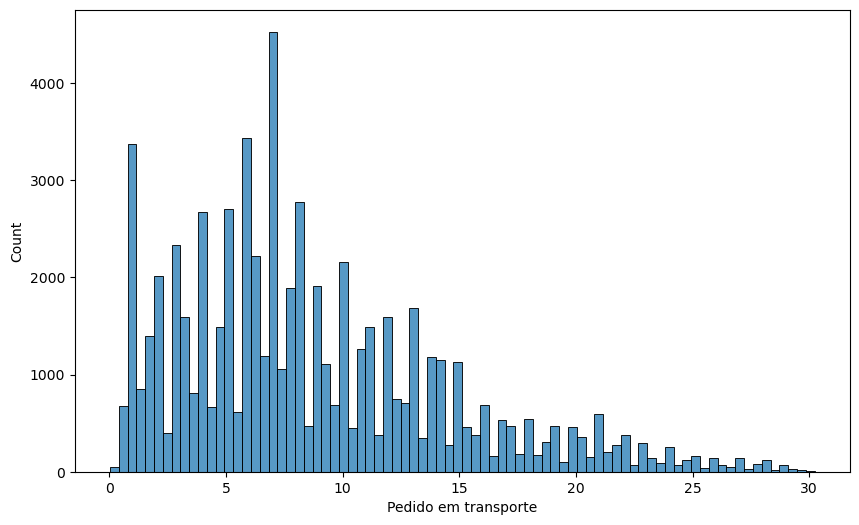

In [564]:
plt.figure(figsize=(10,6))
sns.histplot(df["Pedido em transporte"])

In [565]:
df=df[df["Pedido em transporte"]<out_sup]
df = df[df["Pedido em transporte"] >= 0]
df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1.0,credit_card,1.0,31.75,635d9ac1680f03288e72ada3a1035803,16700.0,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31.000,19.90,11.85
8,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1.0,credit_card,3.0,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075.0,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29.000,145.95,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117589,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1.0,credit_card,4.0,456.28,028c09f007292c4e3a3b10d296e47987,58075.0,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22.000,180.00,48.14
117590,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis_decoracao,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1.0,credit_c

Analisando um pouco a product_category_name

In [566]:
y=df["product_category_name"].value_counts()
x=y.reset_index()
x.columns=["Categoria","Contador"]
x

,Categoria,Contador
0,cama_mesa_banho,6791
1,esporte_lazer,5472
2,moveis_decoracao,4931
3,beleza_saude,4906
4,informatica_acessorios,4503
...,...,...
67,cds_dvds_musicais,11
68,fashion_roupa_infanto_juvenil,5
69,pc_gamer,5
70,artes_e_artesanato,2


In [567]:
categorias = df["product_category_name"].value_counts()

""" # Exibir todas as categorias de produtos
print("Categorias de Produtos:")
for categoria,valor in categorias.items():
    print(categoria,valor)
#print(categorias)
#print(categorias) """

' # Exibir todas as categorias de produtos\nprint("Categorias de Produtos:")\nfor categoria,valor in categorias.items():\n    print(categoria,valor)\n#print(categorias)\n#print(categorias) '

Categorias de Produtos:
cama_mesa_banho 6123
esporte_lazer 4924
beleza_saude 4545
relogios_presentes 2826
brinquedos 2663
cool_stuff 2602
automotivo 2115
perfumaria 2024
papelaria 1430
pet_shop 935
consoles_games 643
instrumentos_musicais 344
livros_interesse_geral 272
casa_construcao 207
market_place 205
audio 204
climatizacao 130
industria_comercio_e_negocios 116
agro_industria_e_comercio 103
livros_tecnicos 94
artigos_de_natal 72
sinalizacao_e_seguranca 52
livros_importados 25
flores 19
musica 14
cine_foto 14
artigos_de_festas 14
seguros_e_servicos 1

In [568]:
categorias

product_category_name
cama_mesa_banho                  6791
esporte_lazer                    5472
moveis_decoracao                 4931
beleza_saude                     4906
informatica_acessorios           4503
                                 ... 
cds_dvds_musicais                  11
fashion_roupa_infanto_juvenil       5
pc_gamer                            5
artes_e_artesanato                  2
seguros_e_servicos                  1
Name: count, Length: 72, dtype: int64

In [569]:
categorias_a_agrupar = {
    'construcao_ferramentas_ferramentas': 'construcao_ferramentas',
    'construcao_ferramentas_construcao': 'construcao_ferramentas',
    'construcao_ferramentas_jardim': 'construcao_ferramentas',
    'construcao_ferramentas_iluminacao': 'construcao_ferramentas',
    'construcao_ferramentas_seguranca': 'construcao_ferramentas',
    'ferramentas_jardim': 'construcao_ferramentas',
    'moveis_sala': 'moveis',
    'moveis_quarto': 'moveis',
    'moveis_colchao_e_estofado': 'moveis',
    'moveis_cozinha_area_de_servico_jantar_e_jardim': 'moveis',
    'moveis_decoracao': 'moveis',
    'moveis_escritorio': 'moveis',
    'pc_gamer': 'pcs',
    'artes_e_artesanato':'artes',
    'telefonia_fixa':'telefonia',
    'alimentos': 'alimentos_bebidas',
    'bebidas': 'alimentos_bebidas',
    'cds_dvds_musicais': 'cds_dvds',
    'dvds_blu_ray': 'cds_dvds',
    'portateis_casa_forno_e_cafe': 'eletroportateis',
    'casa_conforto_2': 'casa_conforto',
    'eletrodomesticos_2': 'eletrodomesticos',
    'malas_acessorios':'fashion',
    'fashion_bolsas_e_acessorios':'fashion',
    'fashion_calcados':'fashion',
    'fashion_underwear_e_moda_praia':'fashion',
    'fashion_roupa_masculina':'fashion',
    'fashion_esporte':'fashion' ,
    'fashion_roupa_feminina':'fashion',
    'fashion_roupa_infanto_juvenil':'fashion',
    'eletronicos':'informatica_acessorios',
    'tablets_impressao_imagem':'informatica_acessorios',
    'la_cuisine':'utilidades_domesticas',
    'fraldas_higiene': 'bebes'
    
}

df['product_category_name'].replace(categorias_a_agrupar, inplace=True)

df

,order_id,customer_id,order_status,order_purchase_timestamp,Pedido em aprovação,order_approved_at,Separando o pedido,order_delivered_carrier_date,Pedido em transporte,order_delivered_customer_date,delivery_time,delivery_time_model,product_id,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_zip_code_prefix,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,order_id.2,order_item_id,product_id.1,seller_id.1,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,0.03,2017-09-13 09:45:35,6.37,2017-09-19 18:34:16,1.21,2017-09-20 23:43:48,7.61,15.63,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,27277,1.0,credit_card,2.0,72.19,871766c5855e863f6eccc05f988b23cb,28013.0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35.000,58.90,13.29
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,0.01,2018-01-14 14:48:30,1.91,2018-01-16 12:36:48,6.03,2018-01-22 13:19:16,7.95,21.39,c777355d18b72b67abbeef9df44fd0fd,moveis,3050.0,33.0,13.0,33.0,5b51032eddd242adc84c38acab88f23d,37564,1.0,credit_card,5.0,216.87,3818d81c6709e39d06b2738a8d3a2474,35661.0,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30.000,199.00,17.87
5,00048cc3ae777c65dbb7d2a0634bc1ea,816cbea969fe5b689b39cfc97a506742,delivered,2017-05-15 21:42:34,1.26,2017-05-17 03:55:27,0.30,2017-05-17 11:05:55,5.11,2017-05-22 13:44:35,6.67,21.10,ef92defde845ab8450f9d70c526ef70f,utilidades_domesticas,450.0,24.0,8.0,15.0,6426d21aca402a131fc0a5d0960a3c90,14091,1.0,boleto,1.0,34.59,85c835d128beae5b4ce8602c491bf385,38017.0,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27.000,21.90,12.69
6,00054e8431b9d7675808bcb819fb4a32,32e2e6ab09e778d99bf2e0ecd4898718,delivered,2017-12-10 11:53:48,0.01,2017-12-10 12:10:31,1.54,2017-12-12 01:07:48,6.87,2017-12-18 22:03:38,8.42,24.50,8d4f2bb7e93e6710a28f34fa83ee7d28,telefonia,200.0,27.0,5.0,20.0,7040e82f899a04d1b434b795a43b4617,1026,1.0,credit_card,1.0,31.75,635d9ac1680f03288e72ada3a1035803,16700.0,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31.000,19.90,11.85
8,0005a1a1728c9d785b8e2b08b904576c,16150771dfd4776261284213b89c304e,delivered,2018-03-19 18:40:33,1.00,2018-03-20 18:35:21,7.25,2018-03-28 00:37:42,1.74,2018-03-29 18:17:31,9.98,9.22,310ae3c140ff94b03219ad0adc3c778f,beleza_saude,2000.0,30.0,12.0,16.0,a416b6a846a11724393025641d4edd5e,3702,1.0,credit_card,3.0,157.60,639d23421f5517f69d0c3d6e6564cf0e,11075.0,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29.000,145.95,11.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117589,fff8287bbae429a99bb7e8c21d151c41,6c1e92a209dbf868706caa831090941e,delivered,2018-03-17 12:11:45,0.01,2018-03-17 12:29:22,4.29,2018-03-21 19:22:25,16.61,2018-04-07 10:07:48,20.91,32.49,bee2e070c39f3dd2f6883a17a5f0da45,informatica_acessorios,175.0,20.0,20.0,20.0,4e922959ae960d389249c378d1c939f5,12327,1.0,credit_card,4.0,456.28,028c09f007292c4e3a3b10d296e47987,58075.0,fff8287bbae429a99bb7e8c21d151c41,2,bee2e070c39f3dd2f6883a17a5f0da45,4e922959ae960d389249c378d1c939f5,2018-03-27 12:29:22.000,180.00,48.14
117590,fff90cdcb3b2e6cfb397d05d562fd3fe,f6cc7b845fde9d4e71361fe6fcd7ef75,delivered,2017-11-24 09:03:47,0.05,2017-11-24 10:11:58,3.52,2017-11-27 22:44:45,1.15,2017-11-29 02:24:25,4.72,13.62,764292b2b0f73f77a0272be03fdd45f3,moveis,750.0,30.0,30.0,11.0,bd23da7354813347129d751591d1a6e2,3971,1.0,credit_card,1.0,101.73,0e1da

In [570]:
#df["product_category_name"].value_counts()

In [571]:
df=df[df["product_category_name"]!="seguros_e_servicos"]
#df["product_category_name"].value_counts()

In [572]:
df["payment_type"].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [573]:
df.loc[df["freight_value"]>300,"freight_value"]=300

In [574]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
Pedido em aprovação                 0
order_approved_at                   0
Separando o pedido                  0
order_delivered_carrier_date        0
Pedido em transporte                0
order_delivered_customer_date       0
delivery_time                       0
delivery_time_model                 0
product_id                          0
product_category_name            1158
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_id                           0
seller_zip_code_prefix              0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
order_id.2  

In [575]:
df['price'].fillna(df['price'].median(), inplace=True)
df['freight_value'].fillna(df['freight_value'].median(), inplace=True)

C:\Users\Dell\AppData\Local\Temp\ipykernel_22780\373674503.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'].fillna(df['price'].median(), inplace=True)
C:\Users\Dell\AppData\Local\Temp\ipykernel_22780\373674503.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['freight_value'].fillna(df['freight_value'].median(), inplace=True)


In [576]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
Pedido em aprovação                 0
order_approved_at                   0
Separando o pedido                  0
order_delivered_carrier_date        0
Pedido em transporte                0
order_delivered_customer_date       0
delivery_time                       0
delivery_time_model                 0
product_id                          0
product_category_name            1158
product_weight_g                    0
product_length_cm                   0
product_height_cm                   0
product_width_cm                    0
seller_id                           0
seller_zip_code_prefix              0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
customer_zip_code_prefix            0
order_id.2  

In [577]:
# Definindo o caminho para a pasta Data
current_dir = os.path.dirname(os.path.abspath('__file__'))
data_dir = os.path.join(current_dir, 'Data')


# Caminho completo para o arquivo CSV
csv_path = os.path.join(data_dir, 'Dataframelimpa_sem_latlong.csv')


# Exportando o DataFrame para um arquivo CSV
df.to_csv(csv_path, index=False)